# Diabetes Analysis using python

Description
This dataset is originally from the National Institute of Diabetes and Kidney diseases.
The objective of the dataset is to dignostically predict whether or not a patients has diabetes, based on certain 
diagnostic measurements included in the dataset. Several constrains were placed on the selection of these instances from
a larger database. In particular,all patients here are females at least 21 years old of pima indian heritage.

# Content


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the
 number of pregnancies the patients has had their BMI, Glucose level, BP, age and so on.

# Problem statement
By using these patients records, we will try to accurately predict wheather or not the patients in dataset have diabetes or not. 

# Data Description

Columns:
    Pregnancies- No. times pregnant
    
    Glucose-Plasma glucose concentration a 2 hours in a glucose tolerance test
    
    BloodPressure-Diastolic blood pressure(mm Hg)
    
    SkinThickness-Triceps skin fold thickness(mm)
    
    Insulin- 2 hour serum insulin (mu U/ml)
    
    BMI-Body mass index(weight in KG/ (Height in m)^2)
    
    DiabetesPedigreeFunction-  Diabetes Pedigree function
    
    Age- Age in years
    
    Outcome- Class variable(0 or 1) 268 out of 278 are 1, others are 0

# Business Objective and Constaint

1.The cost of mis-classification can be very very high.

2.There in no strict letacy concerns.

3.Because this project is from health domain, we have to be very cautious about the result.

# Importing Liabraries

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading data from csv file

In [3]:
cd

C:\Users\prajw


In [4]:
cd Downloads

C:\Users\prajw\Downloads


In [5]:
df_diabetis= pd.read_csv("diabetes.csv")

In [6]:
df_diabetis.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis

In [7]:
#Total no. of columns in the dataset
df_diabetis.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Information about the dataset
df_diabetis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#To know more about the dataset
df_diabetis.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#To know more about the dataset with transpose
df_diabetis.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
#Checking for Null values or not
df_diabetis.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [12]:
#checking for total null values
df_diabetis.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On these columns the value 0 does not make sense and thus indicate missing value.
Following columns have invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI.
It is better to replace zeroes with NAN since after that counting them would be easier and zeroes need to be 
replaced with suitable value.
    

In [13]:
df_diabetis_copy = df_diabetis.copy
df_diabetis_copy=df_diabetis_copy(deep= True)
df_diabetis_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_diabetis_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
print(df_diabetis_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Data Visualization

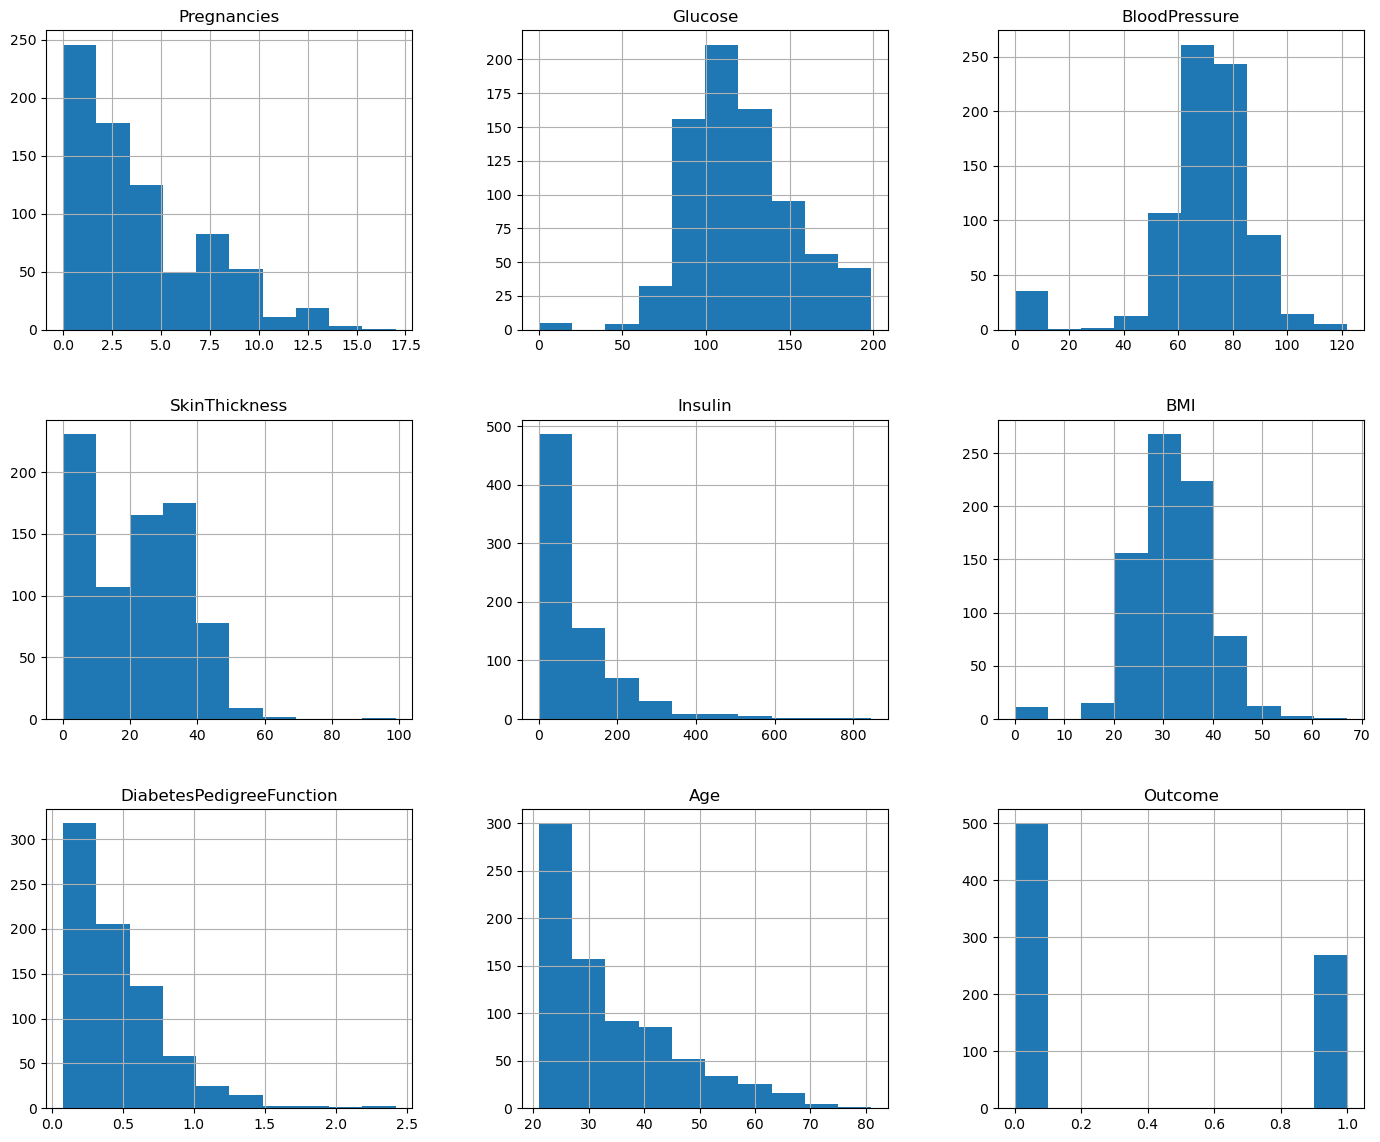

In [15]:
#Plotting the data distribution plots
df_diabetis.hist(figsize=(17,14))
plt.show()

In [17]:
#Aiming to input NAN values for the column in accordance with their distribution
df_diabetis_copy['Glucose'].fillna(df_diabetis_copy['Glucose'].mean(), inplace= True)
df_diabetis_copy['BloodPressure'].fillna(df_diabetis['BloodPressure'].mean(), inplace= True)
df_diabetis_copy['SkinThickness'] .fillna(df_diabetis['SkinThickness'].median(), inplace= True)
df_diabetis_copy['Insulin'] .fillna(df_diabetis['Insulin'].median(), inplace= True)
df_diabetis_copy['BMI'] .fillna(df_diabetis['BMI'].median(), inplace= True)

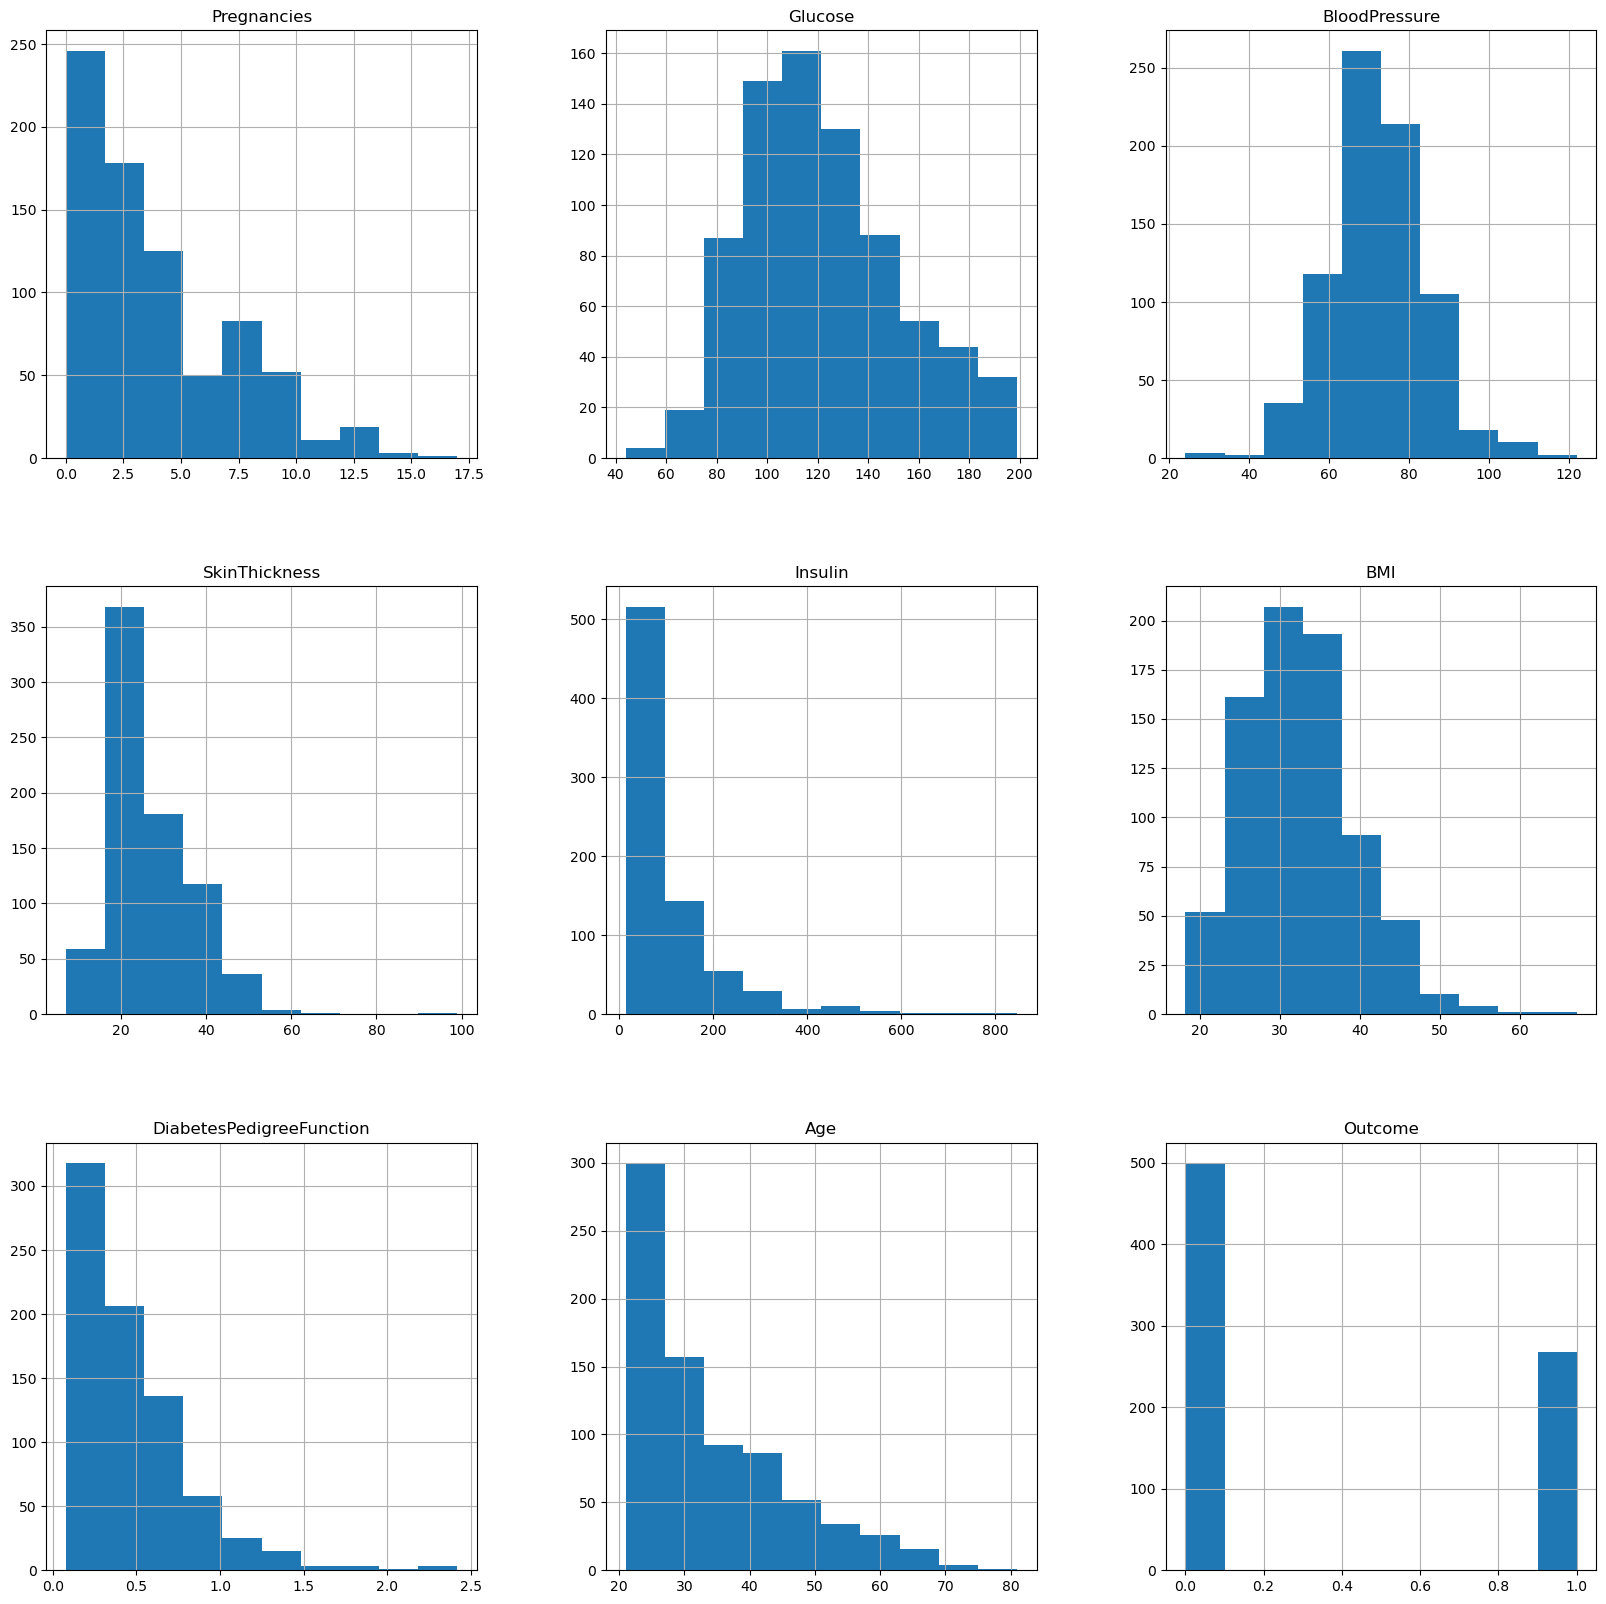

In [18]:
#plotting the distribution after removing the NAN values
p= df_diabetis_copy.hist(figsize=(20,20))

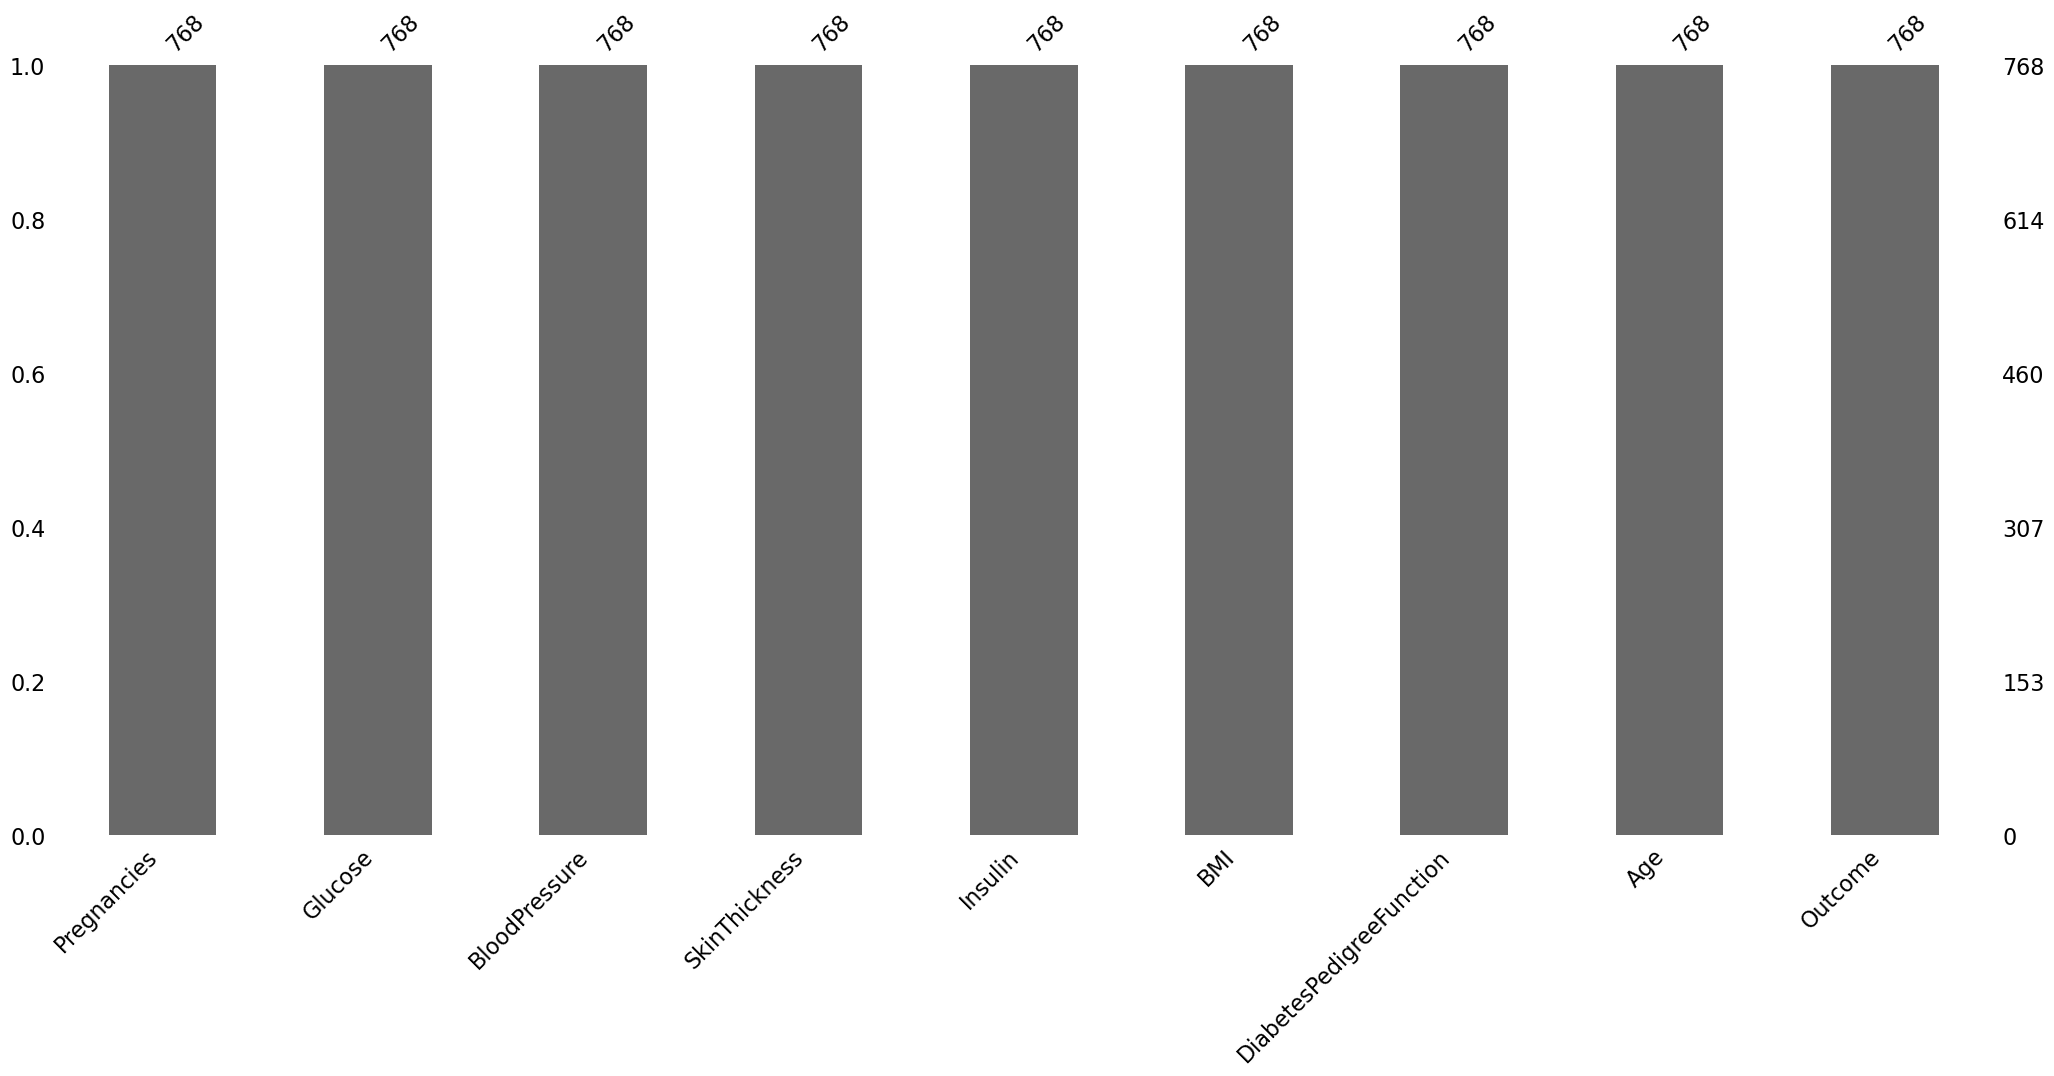

In [19]:
#plotting Null count analysis plot
p = msno.bar(df_diabetis)

0    500
1    268
Name: Outcome, dtype: int64


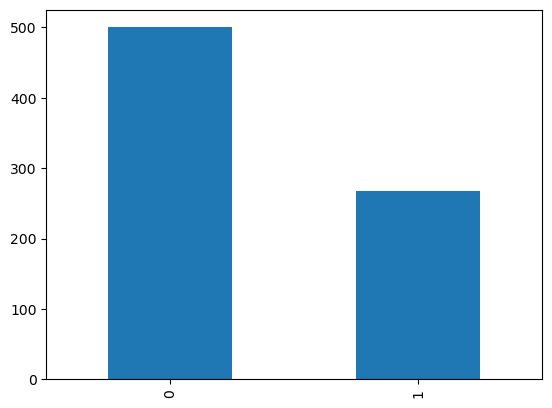

In [20]:
#Checking the balance of the data by plotting the count of outcomes by their value
color_wheel={1: "#0392cf", 2: "#7bc043"}
colors= df_diabetis["Outcome"].map(lambda x:color_wheel.get(x+1))
print(df_diabetis.Outcome.value_counts())
p = df_diabetis.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it
means that diabetes was not present actually.The number of non-diabetic is almost twice the number of diabetic patients.

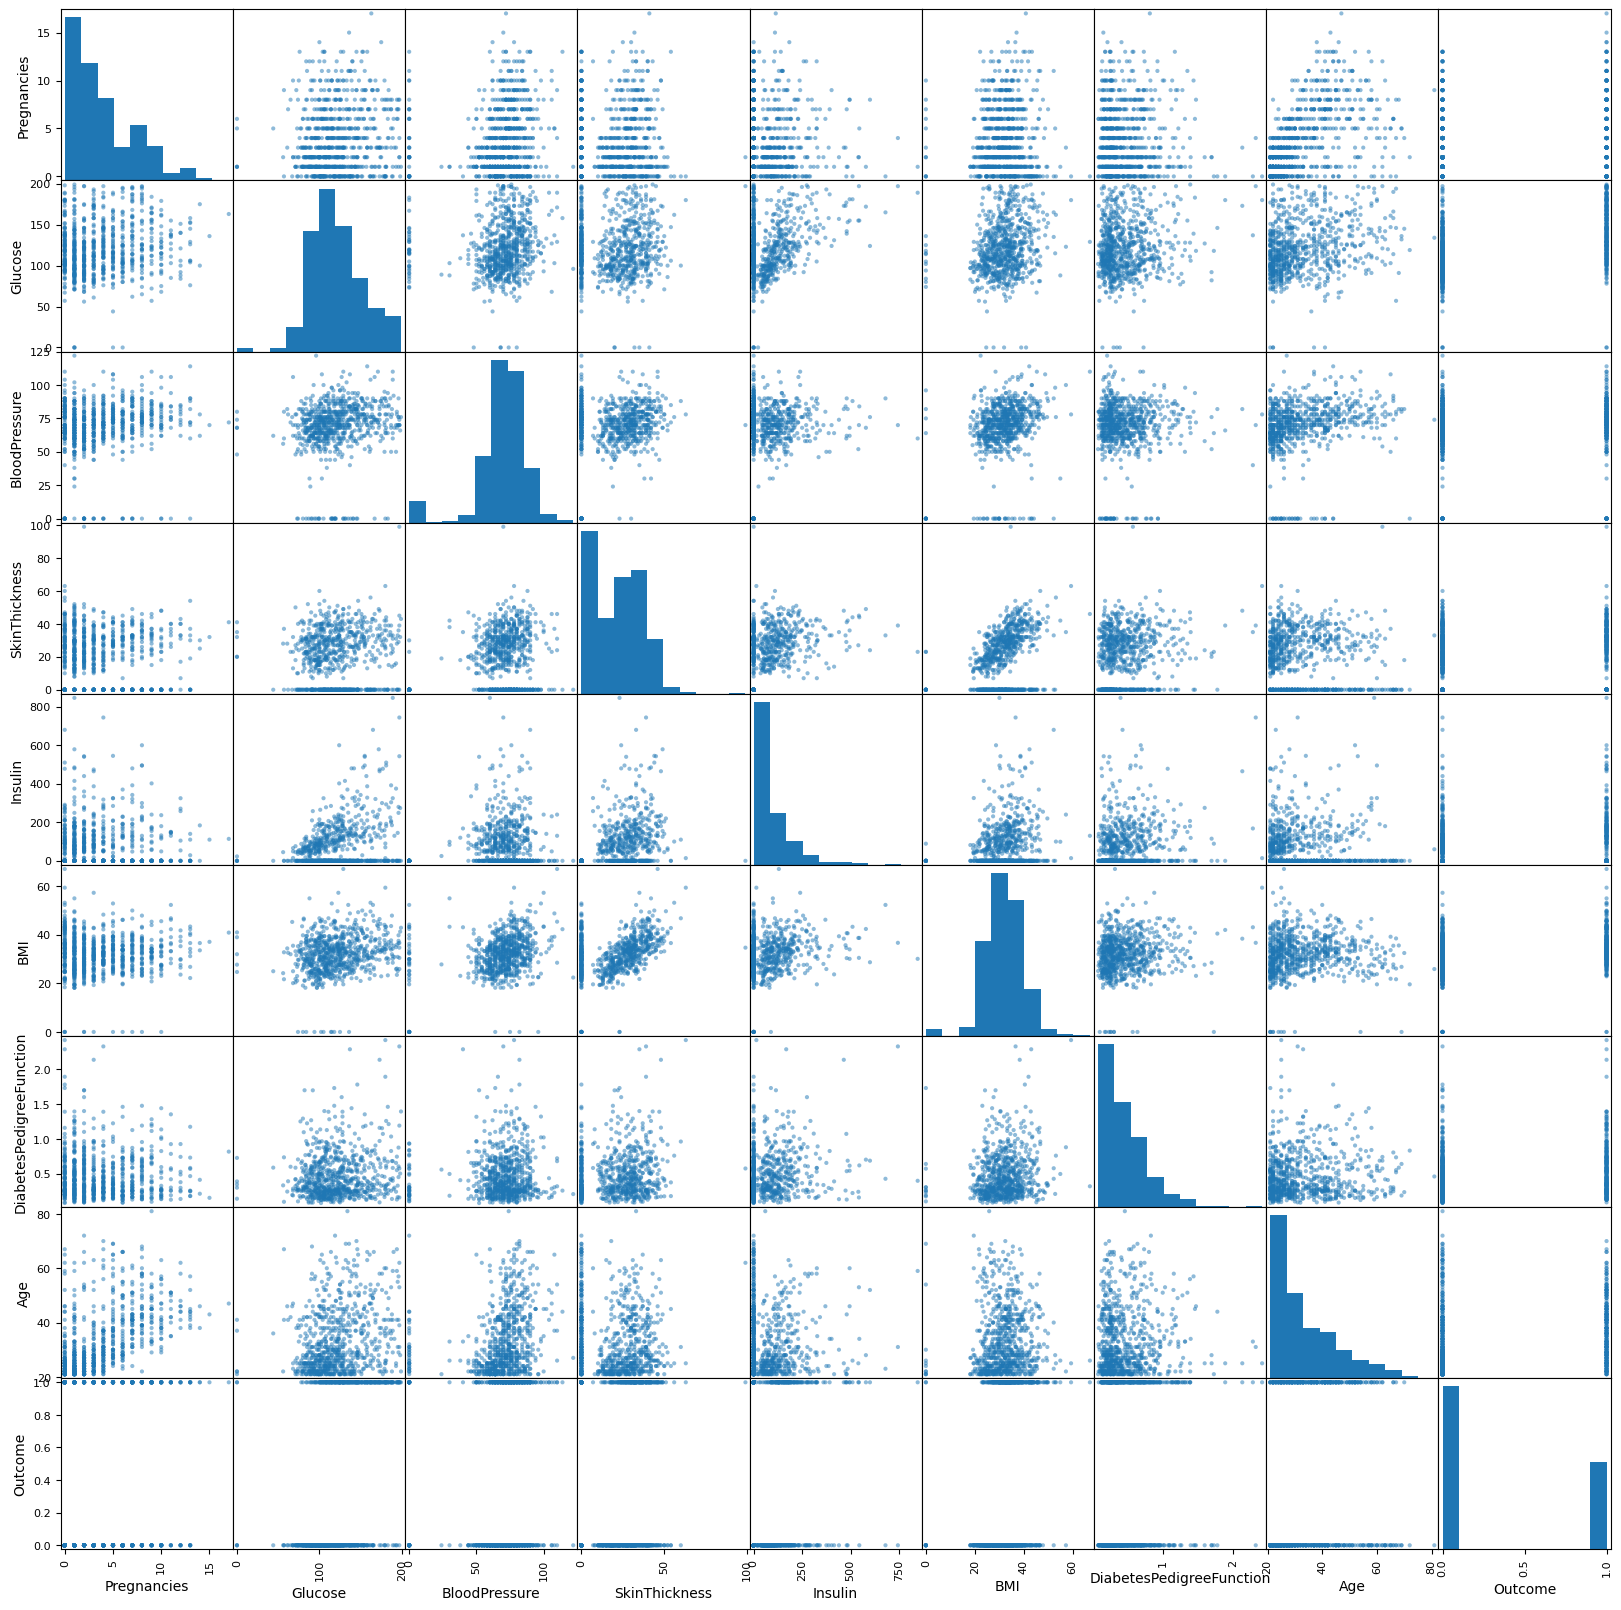

In [21]:
#plot scatter matrix of uncleaned data

p= scatter_matrix(df_diabetis, figsize=(20,20))

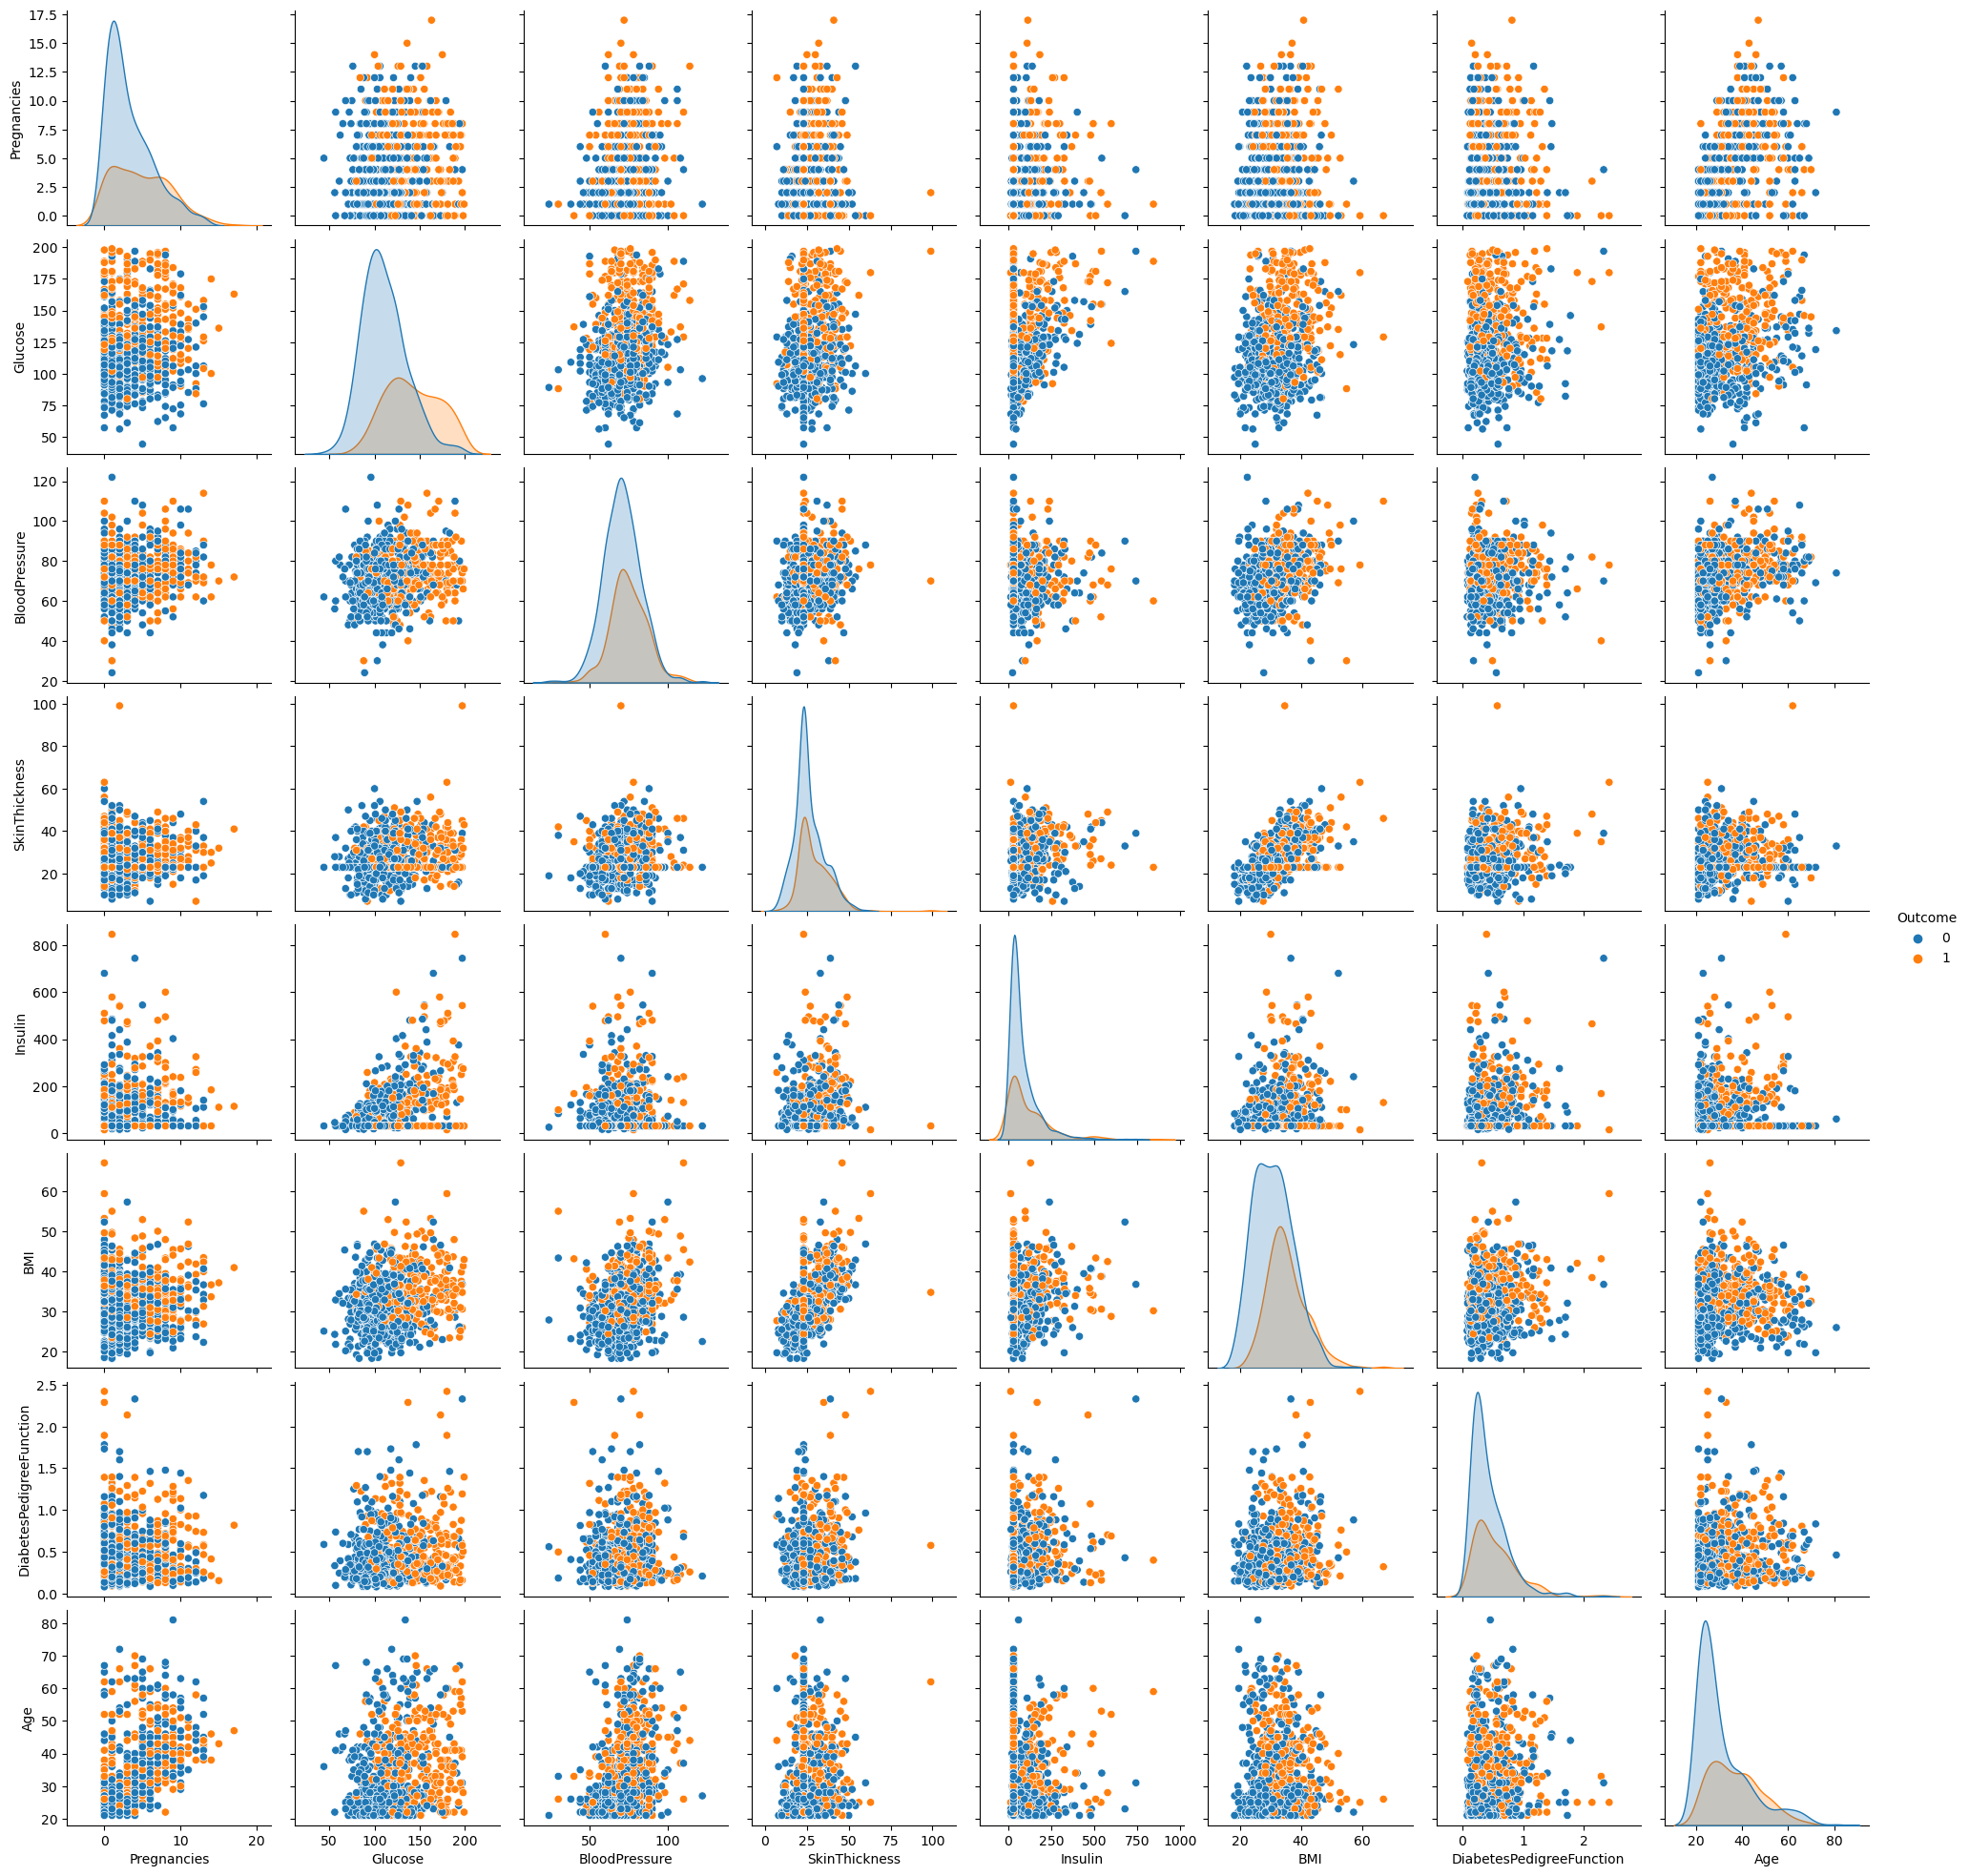

In [22]:
#plotting pair plots for the data
sns.pairplot(df_diabetis_copy, hue='Outcome')
plt.show()

High Glucose level in pregnancy more likely. A combination of high glucose level and a BMI above 30 boosts the risk of diabetes.

# Correlation all the features

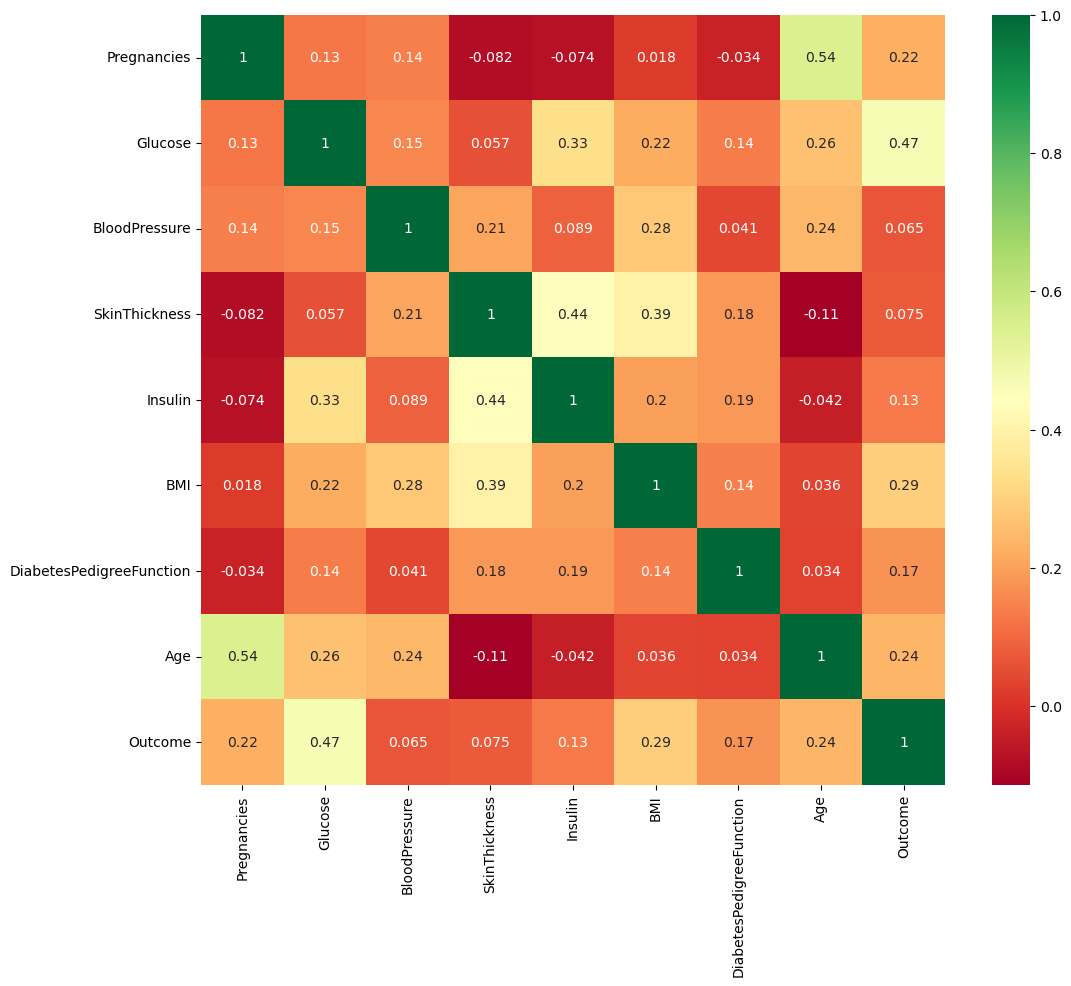

In [23]:
# Plotting the heatmap of correlation between all the feature before the cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(df_diabetis.corr(), annot = True, cmap ="RdYlGn")



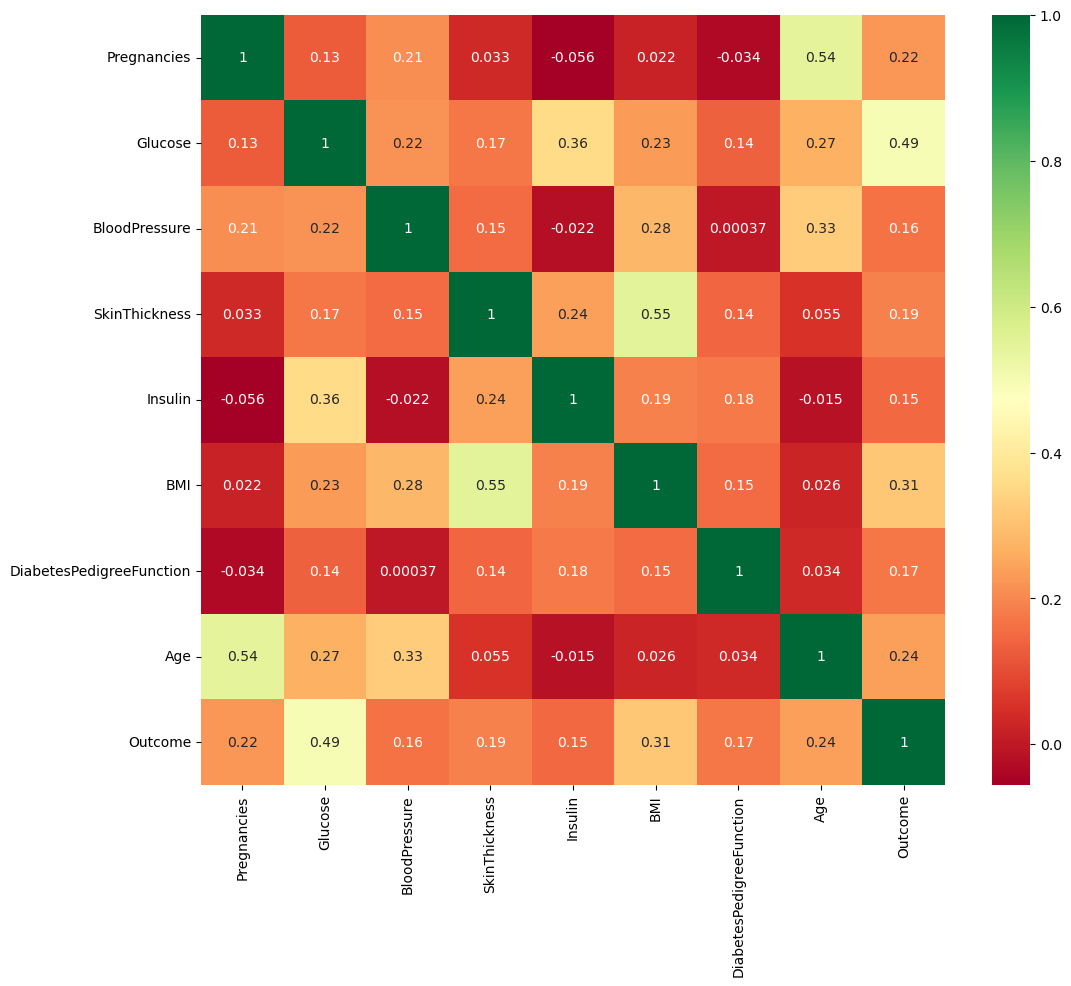

In [24]:
# Plotting the heatmap of correlation between all the feature after the cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(df_diabetis_copy.corr(), annot = True, cmap ="RdYlGn")


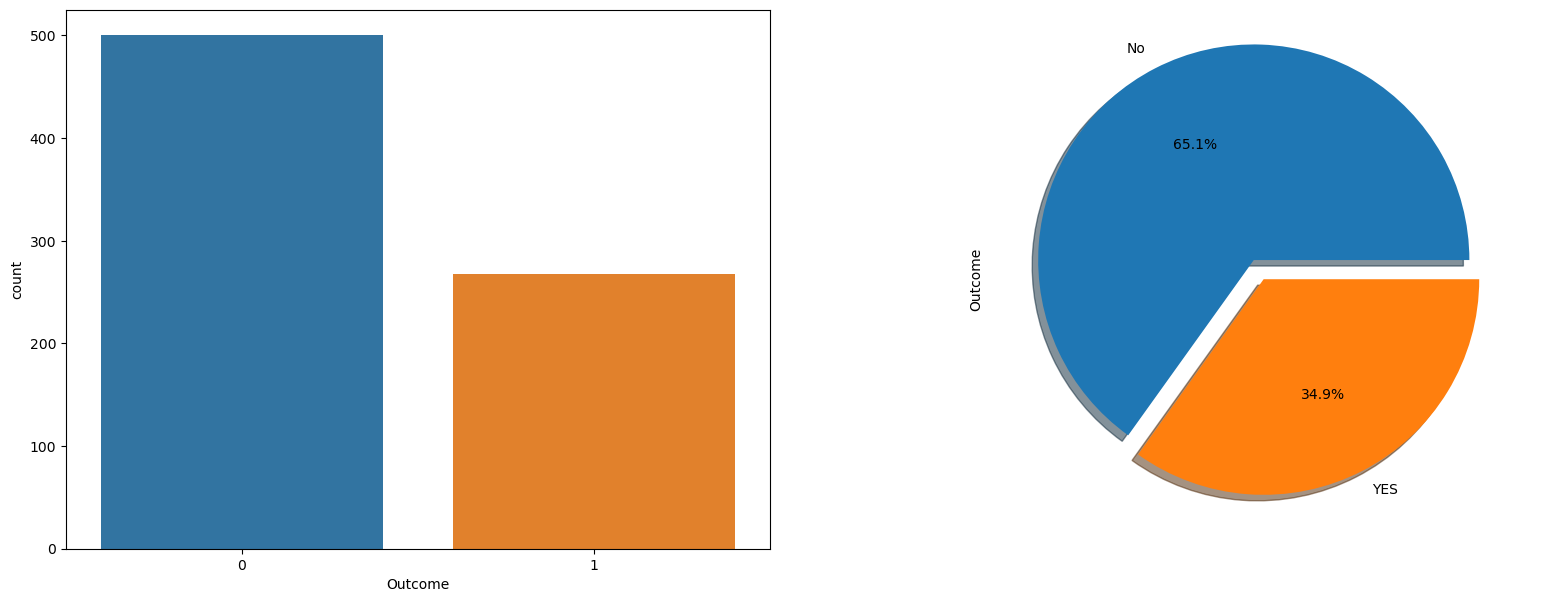

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(data = df_diabetis, x = "Outcome", ax = ax[0])
df_diabetis["Outcome"].value_counts().plot.pie(explode= [0.1,0], autopct= "%1.1f%%", labels= ["No","YES"], shadow= True,
ax=ax[1])


plt.show()

We observe from the above plot that:

65.1% patients in the dataset do NOT have diabetes.

34.9% patients in the dataset has diabetes.

# Conclusion:

In [ ]:
1. It has a descent level of precision, indicating that when it predicts positive cases(diabetic).
It's correct about 65% of the time.

2.Out of the 768 patients, 268 have been diagnosed with diabetes.

3.Patients with high blood pressure has greater chances of diabetes.

4.An increase in Blood pressure BMI and skin thickness also increases.

5.Increasing level of glucose and insulin increases chances of diabetes.
